In [104]:
import pandas as pd
import glob

file_name = glob.glob('../article/headline_noun_keyword*')

keyword_df = []
for file in file_name:
    df = pd.read_pickle(file)
    keyword_df.append(df)

keyword_all = pd.concat(keyword_df, ignore_index = True)
keyword = keyword_all[keyword_all['week'] <= 807]
keyword

,date,co,headline,week,pos
0,2015.08.09. 오후 11:59,머니투데이,미연준 금리 인상 예고 은행별 주택아파트담보대출 사이트로 해법 찾기,501,"[미연, 금리, 인상, 예고, 은행, 주택, 아파트, 담보, 대출, 사이트, 해법]"
1,2015.08.09. 오후 9:52,경향신문,지방 주택시장 과열 양상… 대구 1년 새 집값 11% 올라,501,"[지방, 주택, 시장, 과열, 양상, 대구, 년, 집값]"
2,2015.08.09. 오후 8:51,세계일보,전세 시황 계절 요인에… 치솟던 전세가 상승폭 주춤,501,"[전세, 시황, 계절, 요인, 전세, 상승, 폭]"
3,2015.08.09. 오후 8:51,세계일보,매매 시황 가계부채 대책 후폭풍… 매매가 상승 둔화,501,"[매매, 시황, 가계, 부채, 대책, 후폭풍, 매매, 상승, 둔화]"
4,2015.08.09. 오후 8:49,세계일보,너무 뜨거운 부동산 시장… 손 델라,501,"[부동산, 시장, 손]"
...,...,...,...,...,...
1067224,2015.08.08. 오전 12:02,서울경제,배후수요 풍부 향후 미래가치가 기대되는 천안 레이크타운2차 푸르지오 분양,500,"[배후, 수요, 풍부, 향후, 미래, 가치, 기대, 천안, 레이크, 타운, 차, 푸..."
1067225,2015.08.08. 오전 12:02,헤럴드경제,일산아이파크 수도권미분양아파트 모래알 진주찾기,500,"[일산, 아이파크, 수도, 미분양, 아파트, 모래알, 진주]"
1067226,2015.08.08. 오전 12:02,헤럴드경제,봉담 코오롱 하늘채 편리한 교통 및 우수한 교육환경 자랑,500,"[봉담, 코오롱, 하늘, 편리, 교통, 우수, 교육, 환경, 자랑]"
1067227,2015.08.08. 오전 12:00,경향신문,대명리조트 콘도 회원권으로 여름 휴가 알차게 보내는 방법,500,"[대명, 리조트, 콘, 회원, 여름, 휴가, 방법]"


In [105]:
# df = pd.read_pickle("../article/selectedd_company_article.pkl")
# origin_now_co = list(set(df['co']))

In [106]:
# df['pos'] = keyword['pos']

In [107]:
selected_co_list = ['매일경제', '파이낸셜뉴스', '한국경제TV', '연합뉴스', '헤럴드경제', '한국경제', '세계일보', '뉴스1']

In [108]:
df = df.groupby(['co','week'])['pos'].sum()

In [109]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

documents = [TaggedDocument(df[doc].sum(), [doc]) for i,doc in enumerate(selected_co_list)]
model = Doc2Vec(documents, vector_size=100, window=5, min_count=1000, workers=4, epochs=10)

2021-11-25 18:16:51,781 : INFO : collecting all words and their counts
2021-11-25 18:16:51,782 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2021-11-25 18:16:52,066 : INFO : collected 27458 word types and 8 unique tags from a corpus of 8 examples and 1766063 words
2021-11-25 18:16:52,067 : INFO : Creating a fresh vocabulary
2021-11-25 18:16:52,076 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=1000 retains 329 unique words (1.1981936047782067%% of original 27458, drops 27129)', 'datetime': '2021-11-25T18:16:52.076041', 'gensim': '4.1.2', 'python': '3.8.11 (default, Aug  3 2021, 15:09:35) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.0-84-generic-x86_64-with-glibc2.17', 'event': 'prepare_vocab'}
2021-11-25 18:16:52,076 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=1000 leaves 967868 word corpus (54.803707455509794%% of original 1766063, drops 798195)', 'datetime': '2021-11-25T18:16:52.076928', 'gensim': '4.1.2', 'python': '3.8.11

In [110]:
from gensim.test.utils import get_tmpfile

fname = get_tmpfile("article_doc2vec_model")

model.save(fname)
model = Doc2Vec.load(fname)

2021-11-25 18:16:53,186 : INFO : Doc2Vec lifecycle event {'fname_or_handle': '/tmp/tmppd1doici/article_doc2vec_model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-11-25T18:16:53.186803', 'gensim': '4.1.2', 'python': '3.8.11 (default, Aug  3 2021, 15:09:35) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.0-84-generic-x86_64-with-glibc2.17', 'event': 'saving'}
2021-11-25 18:16:53,188 : INFO : not storing attribute cum_table
2021-11-25 18:16:53,190 : INFO : saved /tmp/tmppd1doici/article_doc2vec_model
2021-11-25 18:16:53,190 : INFO : loading Doc2Vec object from /tmp/tmppd1doici/article_doc2vec_model
2021-11-25 18:16:53,192 : INFO : loading dv recursively from /tmp/tmppd1doici/article_doc2vec_model.dv.* with mmap=None
2021-11-25 18:16:53,193 : INFO : loading wv recursively from /tmp/tmppd1doici/article_doc2vec_model.wv.* with mmap=None
2021-11-25 18:16:53,193 : INFO : setting ignored attribute cum_table to None
2021-11-25 18:16:53,196 : INFO : Doc2Vec lifec

In [111]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=12)

In [112]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

labels = []
tokens = []
words_dv = list(model.dv.index_to_key)
words_wv = list(model.wv.index_to_key)
for word in words_dv:
    tokens.append(model.dv[word])
    labels.append(word)
for word in words_wv:
    tokens.append(model.wv[word])
    labels.append(word)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

/home/younggyu/anaconda3/envs/workplace/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/envs/workplace/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/envs/workplace/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/envs/workplace/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/envs/workplace/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54028 missing from current font.
  font.set_text(s, 0.0, flags=flags)


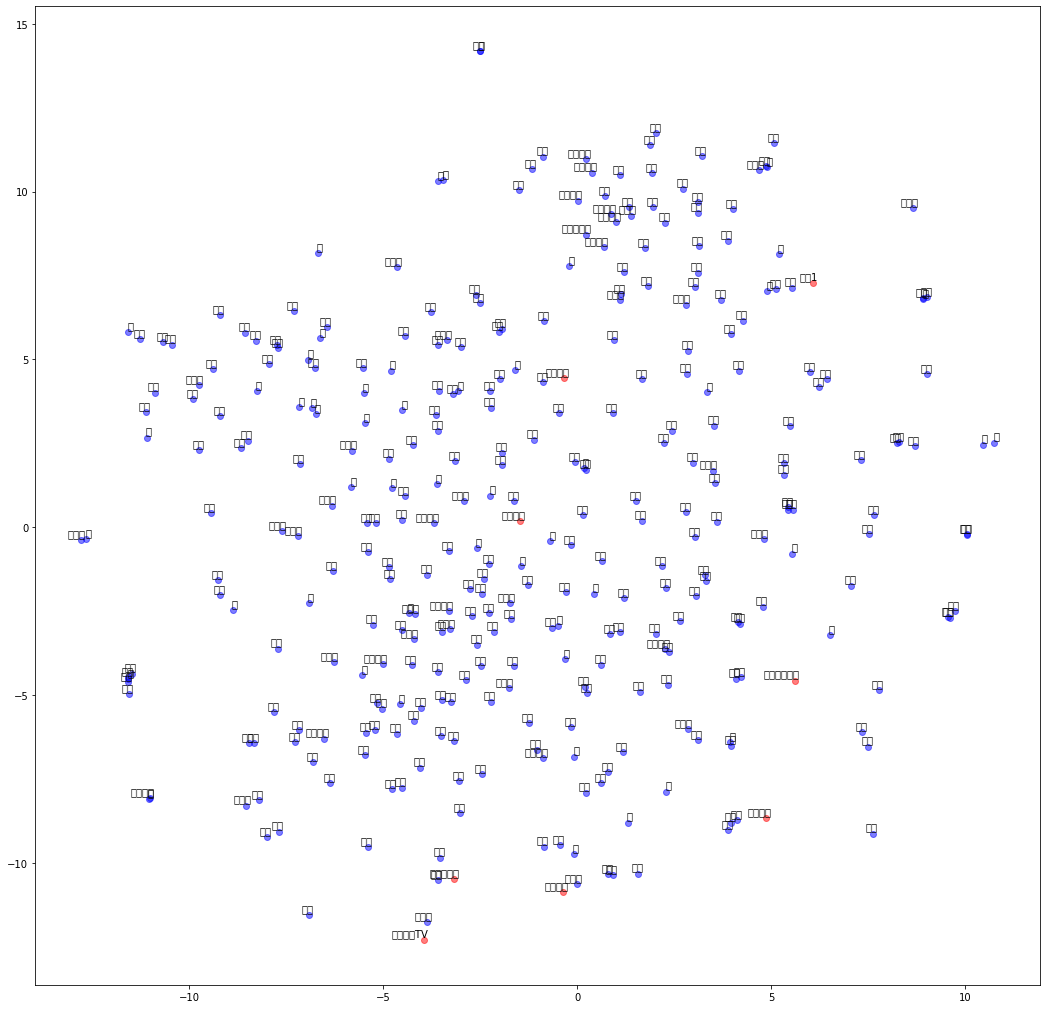

In [113]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(18, 18)) 
for i in range(len(x)):
    if labels[i] in words_dv:
        if labels[i] in selected_co_list:
            color='r'
        else:
            color='k'
    else:
        color='b'
    plt.scatter(x[i],y[i], color = color,alpha = 0.5)
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom', )

plt.show()

In [114]:
import umap
reducer = umap.UMAP()

In [115]:
tokens[0]

array([ 8.64414155e-01,  1.62978142e-01, -4.15092707e-02,  1.64004219e+00,
       -2.50999898e-01, -1.04617186e-01, -5.99053502e-01, -1.52363193e+00,
       -1.75679576e+00, -4.50964272e-01, -3.49160619e-02,  6.27587974e-01,
       -6.70908034e-01,  2.32287154e-01, -1.28492737e+00, -1.45948684e+00,
        1.35691583e-01,  9.51280773e-01, -1.06733179e+00,  1.66836751e+00,
       -2.34166048e-02,  4.90119457e-01, -8.67478728e-01, -5.27238667e-01,
        1.70013714e+00, -8.50115001e-01, -7.27099180e-01, -1.19866081e-01,
        1.13977885e+00, -2.22732008e-01,  1.62456468e-01,  9.73251283e-01,
        3.35514881e-02, -1.18116856e-01,  6.58141255e-01, -8.29655170e-01,
       -1.52017295e-01, -1.65473558e-02,  2.78667957e-01,  9.68956232e-01,
       -3.65551412e-01, -1.04290247e+00,  2.73613632e-01, -2.84261070e-02,
       -1.53536528e-01, -5.78633666e-01,  1.16527200e+00, -1.17959237e+00,
       -4.74896207e-02,  6.92365170e-02,  2.85955761e-02, -2.14170456e-01,
       -7.99686193e-01, -

In [116]:
embedding = reducer.fit_transform(tokens)
embedding.shape

(337, 2)

In [117]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[embedding[i,0],embedding[i,1]] for i in range(20)])
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans.labels_

array([0, 3, 2, 3, 0, 3, 0, 2, 0, 1, 1, 1, 3, 0, 1, 2, 1, 1, 1, 3],
      dtype=int32)

In [118]:
company = {0:[],1:[],2:[],3:[]}

for i,c in enumerate(kmeans.labels_):
    company[c].append(labels[i])

company

{0: ['매일경제', '헤럴드경제', '세계일보', '분양', '원'],
 1: ['아파트', '주택', '만', '부동산', '가구', '서울', '억'],
 2: ['한국경제TV', '뉴스1', '건설'],
 3: ['파이낸셜뉴스', '연합뉴스', '한국경제', '도시', '개발']}

In [119]:
for i in range(4):
    print(f'cluster {i}')
    for co in company[i]:
        print(co,keyword[keyword['co'] == co].count()[0])

cluster 0
매일경제 111656
헤럴드경제 63949
세계일보 24205
분양 0
원 0
cluster 1
아파트 0
주택 0
만 0
부동산 0
가구 0
서울 0
억 0
cluster 2
한국경제TV 64141
뉴스1 19795
건설 0
cluster 3
파이낸셜뉴스 96791
연합뉴스 50657
한국경제 70121
도시 0
개발 0


/home/younggyu/anaconda3/envs/workplace/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/envs/workplace/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/envs/workplace/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/envs/workplace/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/envs/workplace/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/h

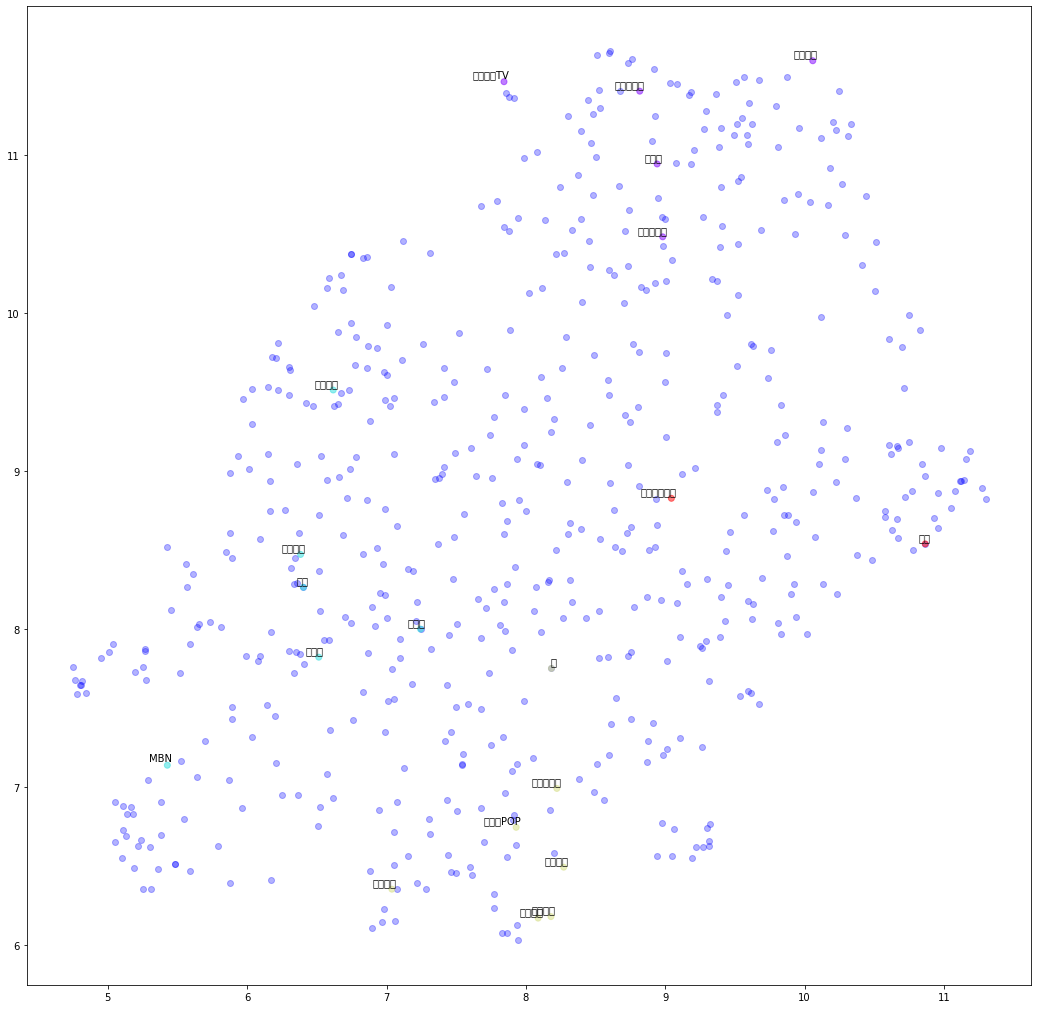

In [ ]:
plt.figure(figsize=(18, 18)) 
for i in range(len(x)):
    if labels[i] in words_wv:
        color='b'
        plt.scatter(embedding[i,0],embedding[i,1], color = color, alpha=0.3)

X = embedding[:20,0]
Y = embedding[:20,1]
L = labels[:20]
C = list(kmeans.labels_)

plt.scatter(X,Y, c=C, cmap=plt.cm.rainbow, alpha=0.5)

for i in range(20):
    plt.annotate(labels[i],
                 xy=(embedding[i,0],embedding[i,1]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom', )
plt.savefig('./word_embedding_umap.png')

In [ ]:
kmeans.cluster_centers_

array([[ 8.927909 , 11.179459 ],
       [ 6.431556 ,  8.202295 ],
       [ 7.9872923,  6.669693 ],
       [ 9.954085 ,  8.68415  ]], dtype=float32)

In [ ]:
from datetime import date
start_date = date(2006,1,1)
mh = date(2008,2,24)
mb = date(2013,2,24)
gh = date(2016,12,9)
ga = date(2017,5,10) #황교안 대행
ji = date(2022,5,9)
mhw = (mh - start_date).days//7
mbw = (mb - start_date).days//7
ghw = (gh - start_date).days//7
gaw = (ga - start_date).days//7
jiw = (ji - start_date).days//7

In [ ]:
gov = ['mh','mb','gh','ji']

In [ ]:
time_range = {}
time_range['mh'] = (0,mhw)
time_range['mb'] = (mhw,mbw)
time_range['gh'] = (mbw,ghw)
#time_range['ga'] = (ghw,gaw)
time_range['ji'] = (gaw,808)

In [ ]:
df = keyword

In [ ]:
gov_article = {}
for g in gov:
    week_s, week_e = time_range[g]
    gov_article[g] = df[(df['week'] >= week_s) & (df['week'] < week_e)].groupby(['co','week'])['pos'].sum()

In [ ]:
model = {}
for g in gov:
    documents = [TaggedDocument(gov_article[g][doc].sum(), [doc]) for i,doc in enumerate(origin_now_co)]
    model[g] = Doc2Vec(documents, vector_size=100, window=5, min_count=300, workers=4, epochs=10)

2021-11-25 18:14:30,379 : INFO : collecting all words and their counts
2021-11-25 18:14:30,380 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2021-11-25 18:14:30,434 : INFO : collected 14990 word types and 16 unique tags from a corpus of 16 examples and 424017 words
2021-11-25 18:14:30,435 : INFO : Creating a fresh vocabulary
2021-11-25 18:14:30,440 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=300 retains 238 unique words (1.5877251501000667%% of original 14990, drops 14752)', 'datetime': '2021-11-25T18:14:30.440163', 'gensim': '4.1.2', 'python': '3.8.11 (default, Aug  3 2021, 15:09:35) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.0-84-generic-x86_64-with-glibc2.17', 'event': 'prepare_vocab'}
2021-11-25 18:14:30,441 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=300 leaves 221432 word corpus (52.22243447786292%% of original 424017, drops 202585)', 'datetime': '2021-11-25T18:14:30.441105', 'gensim': '4.1.2', 'python': '3.8.11 (d

KeyError: '헤럴드POP'

In [ ]:
labels = {}
tokens = {}
words_dv = {}
words_wv = {}
for g in gov:
    labels[g] = []
    tokens[g] = []
    words_dv[g] = list(model[g].dv.index_to_key)
    words_wv[g] = list(model[g].wv.index_to_key)
    for word in words_dv[g]:
        tokens[g].append(model[g].dv[word])
        labels[g].append(word)
    for word in words_wv[g]:
        tokens[g].append(model[g].wv[word])
        labels[g].append(word)

In [ ]:
embedding = {}
for g in gov:
    embedding[g] = reducer.fit_transform(tokens[g])
    print(embedding[g].shape)

In [ ]:
kmeans = {}
for g in gov:
    X = np.array([[embedding[g][i,0],embedding[g][i,1]] for i in range(20)])
    kmeans[g] = KMeans(n_clusters=4, random_state=0).fit(X)
    print(kmeans[g].labels_)

In [ ]:
for g in gov:
    plt.figure(figsize=(18, 18)) 
    for i in range(embedding[g].shape[0]):
        if labels[g][i] in words_wv[g]:
            color='b'
            plt.scatter(embedding[g][i,0],embedding[g][i,1], color = color, alpha=0.3)

    X = embedding[g][:20,0]
    Y = embedding[g][:20,1]
    L = labels[g][:20]
    C = list(kmeans[g].labels_)

    plt.scatter(X,Y, c=C, cmap=plt.cm.rainbow, alpha=0.5)

    for i in range(20):
        plt.annotate(labels[g][i],
                     xy=(embedding[g][i,0],embedding[g][i,1]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom', )
    plt.savefig(f'./word_embedding_umap{g}.png')

In [ ]:
company = {}

for g in gov:
    g_co = {0:[],1:[],2:[],3:[]}
    for i,c in enumerate(kmeans[g].labels_):
        g_co[c].append(labels[g][i])
    company[g] = g_co

In [ ]:
for g in gov:
    display(company[g])